Приведены данные по ценам квадратного метра загородки в населенных пунктах МО (статистика с авито, добавлено расстояние от МКАД и численность населения).
https://docs.google.com/spreadsheets/d/1n_LZWqz3hy0FDHoPmEriTgJO27tDDT2VnoH6RLmyhUg/edit?usp=sharing

--
Задачи:
- проанализировать зависимость цен от километража и численности населения,
- понять, есть ли выраженные сезонные колебания цен,
- сделать прогноз на апрель

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

pd.set_option("display.max_columns", 25)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

Импортируем и подготовим данные.

In [2]:
df = pd.read_csv('C:\\Users\\olhae\\Downloads\\загородка.csv')
df.head()

,Аренда/Продажа,Регион,Город,население,км от МКАД,Кол-во комнат,Цена за,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
0,Продам,Московская область,Апрелевка,30669,28,Все,за м2,61111,51800,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289,59896,62222,61669
1,Продам,Московская область,Балашиха,507366,11,Все,за м2,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545
2,Продам,Московская область,Белоозёрский,17898,61,Все,за м2,27857,27772,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091,30000,29091,27422
3,Продам,Московская область,Бронницы,22531,52,Все,за м2,27917,27778,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816,28471,28636,28333
4,Продам,Московская область,Вербилки,6869,84,Все,за м2,18518,20000,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643,20000,20000,19643


In [3]:
df.describe()

,население,км от МКАД,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
count,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00,78.00
mean,62825.96,59.68,34879.63,34733.85,34855.47,35235.14,35443.55,35113.22,34700.05,34473.94,34476.45,34356.50,34415.77,34823.08,35089.14,35562.21,35776.58,35945.41,35904.19
std,82415.85,35.97,15236.81,14615.64,14634.45,14650.58,15219.47,15149.46,15188.77,15186.97,15505.27,15353.65,15444.04,15694.75,15595.87,15870.72,15982.57,16156.54,16233.16
min,3309.00,3.00,16000.00,16667.00,17000.00,16458.00,16667.00,16145.00,15625.00,15385.00,15273.00,15077.00,15541.00,15455.00,15833.00,15500.00,15500.00,16429.00,16667.00
25%,11061.75,33.00,24428.75,23857.50,24233.25,24442.50,24166.75,23507.75,23250.00,23866.25,23924.25,23626.50,23352.50,23313.25,23741.50,24071.50,24531.25,24111.00,24193.75
50%,25476.50,57.50,29129.00,30116.50,29514.50,31348.50,30625.00,30972.00,29657.50,29522.50,29939.00,29823.00,29509.00,30422.50,30208.50,30535.00,31250.00,31399.00,31111.00
75%,87602.00,85.50,40714.00,40592.75,40777.75,41250.25,42180.50,41403.25,40681.75,41086.50,40063.75,39782.50,40111.00,40978.00,41875.00,43596.50,43273.75,43184.25,42354.00
max,507366.00,138.00,81027.00,77083.00,75000.00,76923.00,77320.00,75410.00,75000.00,74000.00,79762.00,75258.00,75410.00,79051.00,79618.00,81200.00,83810.00,80905.00,83673.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Аренда/Продажа  78 non-null     object
 1   Регион          78 non-null     object
 2   Город           78 non-null     object
 3   население       78 non-null     int64 
 4   км от МКАД      78 non-null     int64 
 5   Кол-во комнат   78 non-null     object
 6   Цена за         78 non-null     object
 7   ноя.18          78 non-null     int64 
 8   дек.18          78 non-null     int64 
 9   янв.19          78 non-null     int64 
 10  фев.19          78 non-null     int64 
 11  мар.19          78 non-null     int64 
 12  апр.19          78 non-null     int64 
 13  май.19          78 non-null     int64 
 14  июн.19          78 non-null     int64 
 15  июл.19          78 non-null     int64 
 16  авг.19          78 non-null     int64 
 17  сен.19          78 non-null     int64 
 18  окт.19      

In [5]:
print(df['Аренда/Продажа'].value_counts())
print(df['Регион'].value_counts())
print(df['Кол-во комнат'].value_counts())
print(df['Цена за'].value_counts())

Продам    78
Name: Аренда/Продажа, dtype: int64
Московская область    78
Name: Регион, dtype: int64
Все    78
Name: Кол-во комнат, dtype: int64
за м2    78
Name: Цена за, dtype: int64


Поскольку все данные по продажам, по Московсской области, цена везде указана за 1 кв.м. и за всю площадь, удалим лишние столбцы

In [6]:
df.drop('Аренда/Продажа', axis=1, inplace=True)
df.drop('Регион', axis=1, inplace=True)
df.drop('Кол-во комнат', axis=1, inplace=True)
df.drop('Цена за', axis=1, inplace=True)

In [7]:
df.head()

,Город,население,км от МКАД,ноя.18,дек.18,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19,янв.20,фев.20,мар.20
0,Апрелевка,30669,28,61111,51800,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289,59896,62222,61669
1,Балашиха,507366,11,54167,56818,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333,55800,56000,54545
2,Белоозёрский,17898,61,27857,27772,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091,30000,29091,27422
3,Бронницы,22531,52,27917,27778,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816,28471,28636,28333
4,Вербилки,6869,84,18518,20000,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643,20000,20000,19643


In [12]:
col_prices = list(df.columns[3:])
col_prices

['ноя.18',
 'дек.18',
 'янв.19',
 'фев.19',
 'мар.19',
 'апр.19',
 'май.19',
 'июн.19',
 'июл.19',
 'авг.19',
 'сен.19',
 'окт.19',
 'ноя.19',
 'дек.19',
 'янв.20',
 'фев.20',
 'мар.20']

# Сезонность 

Для оценки сезонности возьмем данные за 2019 год и посмотрим, как они распределены

In [21]:
df19 = df[col_prices[2:14]]
df19.insert(0, 'Город', df['Город'])
df19

,Город,янв.19,фев.19,мар.19,апр.19,май.19,июн.19,июл.19,авг.19,сен.19,окт.19,ноя.19,дек.19
0,Апрелевка,48333,50000,52677,55556,54933,52778,52893,53521,53243,54688,57143,59289
1,Балашиха,56604,56054,55093,53333,54615,56738,58594,57500,56767,55333,55714,55333
2,Белоозёрский,27739,27990,27778,29167,29167,29167,28810,28438,28000,27778,28571,29091
3,Бронницы,28824,28571,27577,28037,27800,27857,27222,27143,27816,27816,27778,27816
4,Вербилки,20000,19750,19231,19889,20000,18750,17742,17857,18000,19000,19792,19643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Электрогорск,17000,16458,16667,17000,17000,16837,16667,16667,16667,16447,16667,16667
74,Электроизолятор,21433,21433,21433,21433,21433,21433,21433,23316,21467,21467,21467,22222
75,Электросталь,22222,22000,21667,22500,21429,21333,21389,21264,22648,23000,22500,23226
76,Электроугли,37500,35750,36364,33333,35443,37750,37857,39130,38000,38500,40000,40000


Построим график среднего уровня цен по месяцам:

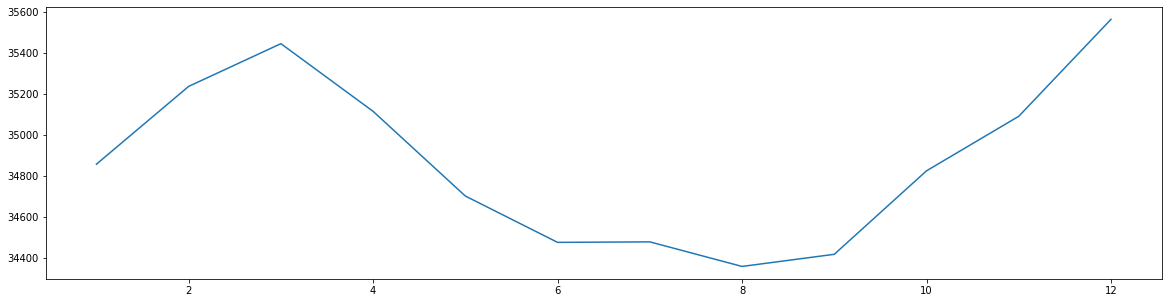

In [41]:
# для средних значений по всем городам:
rcParams["figure.figsize"] = 20, 5

x = np.arange(1, 13)
y = df19.mean()
plt.plot(x, y)

plt.show()

In [42]:
y

янв.19   34855.47
фев.19   35235.14
мар.19   35443.55
апр.19   35113.22
май.19   34700.05
июн.19   34473.94
июл.19   34476.45
авг.19   34356.50
сен.19   34415.77
окт.19   34823.08
ноя.19   35089.14
дек.19   35562.21
dtype: float64

In [43]:
# Посчитаем помесячное соотношение к общему среднему:
z = y/y.mean()
z

янв.19   1.00
фев.19   1.01
мар.19   1.02
апр.19   1.01
май.19   0.99
июн.19   0.99
июл.19   0.99
авг.19   0.99
сен.19   0.99
окт.19   1.00
ноя.19   1.01
дек.19   1.02
dtype: float64

Видим, что в целом наблюдается повышение уровня цен весной и перед новогодними праздниками и снижение в летнем сезоне, что вполне ожидаемо. Но это колебания небольшие, в пределах 1-2%.

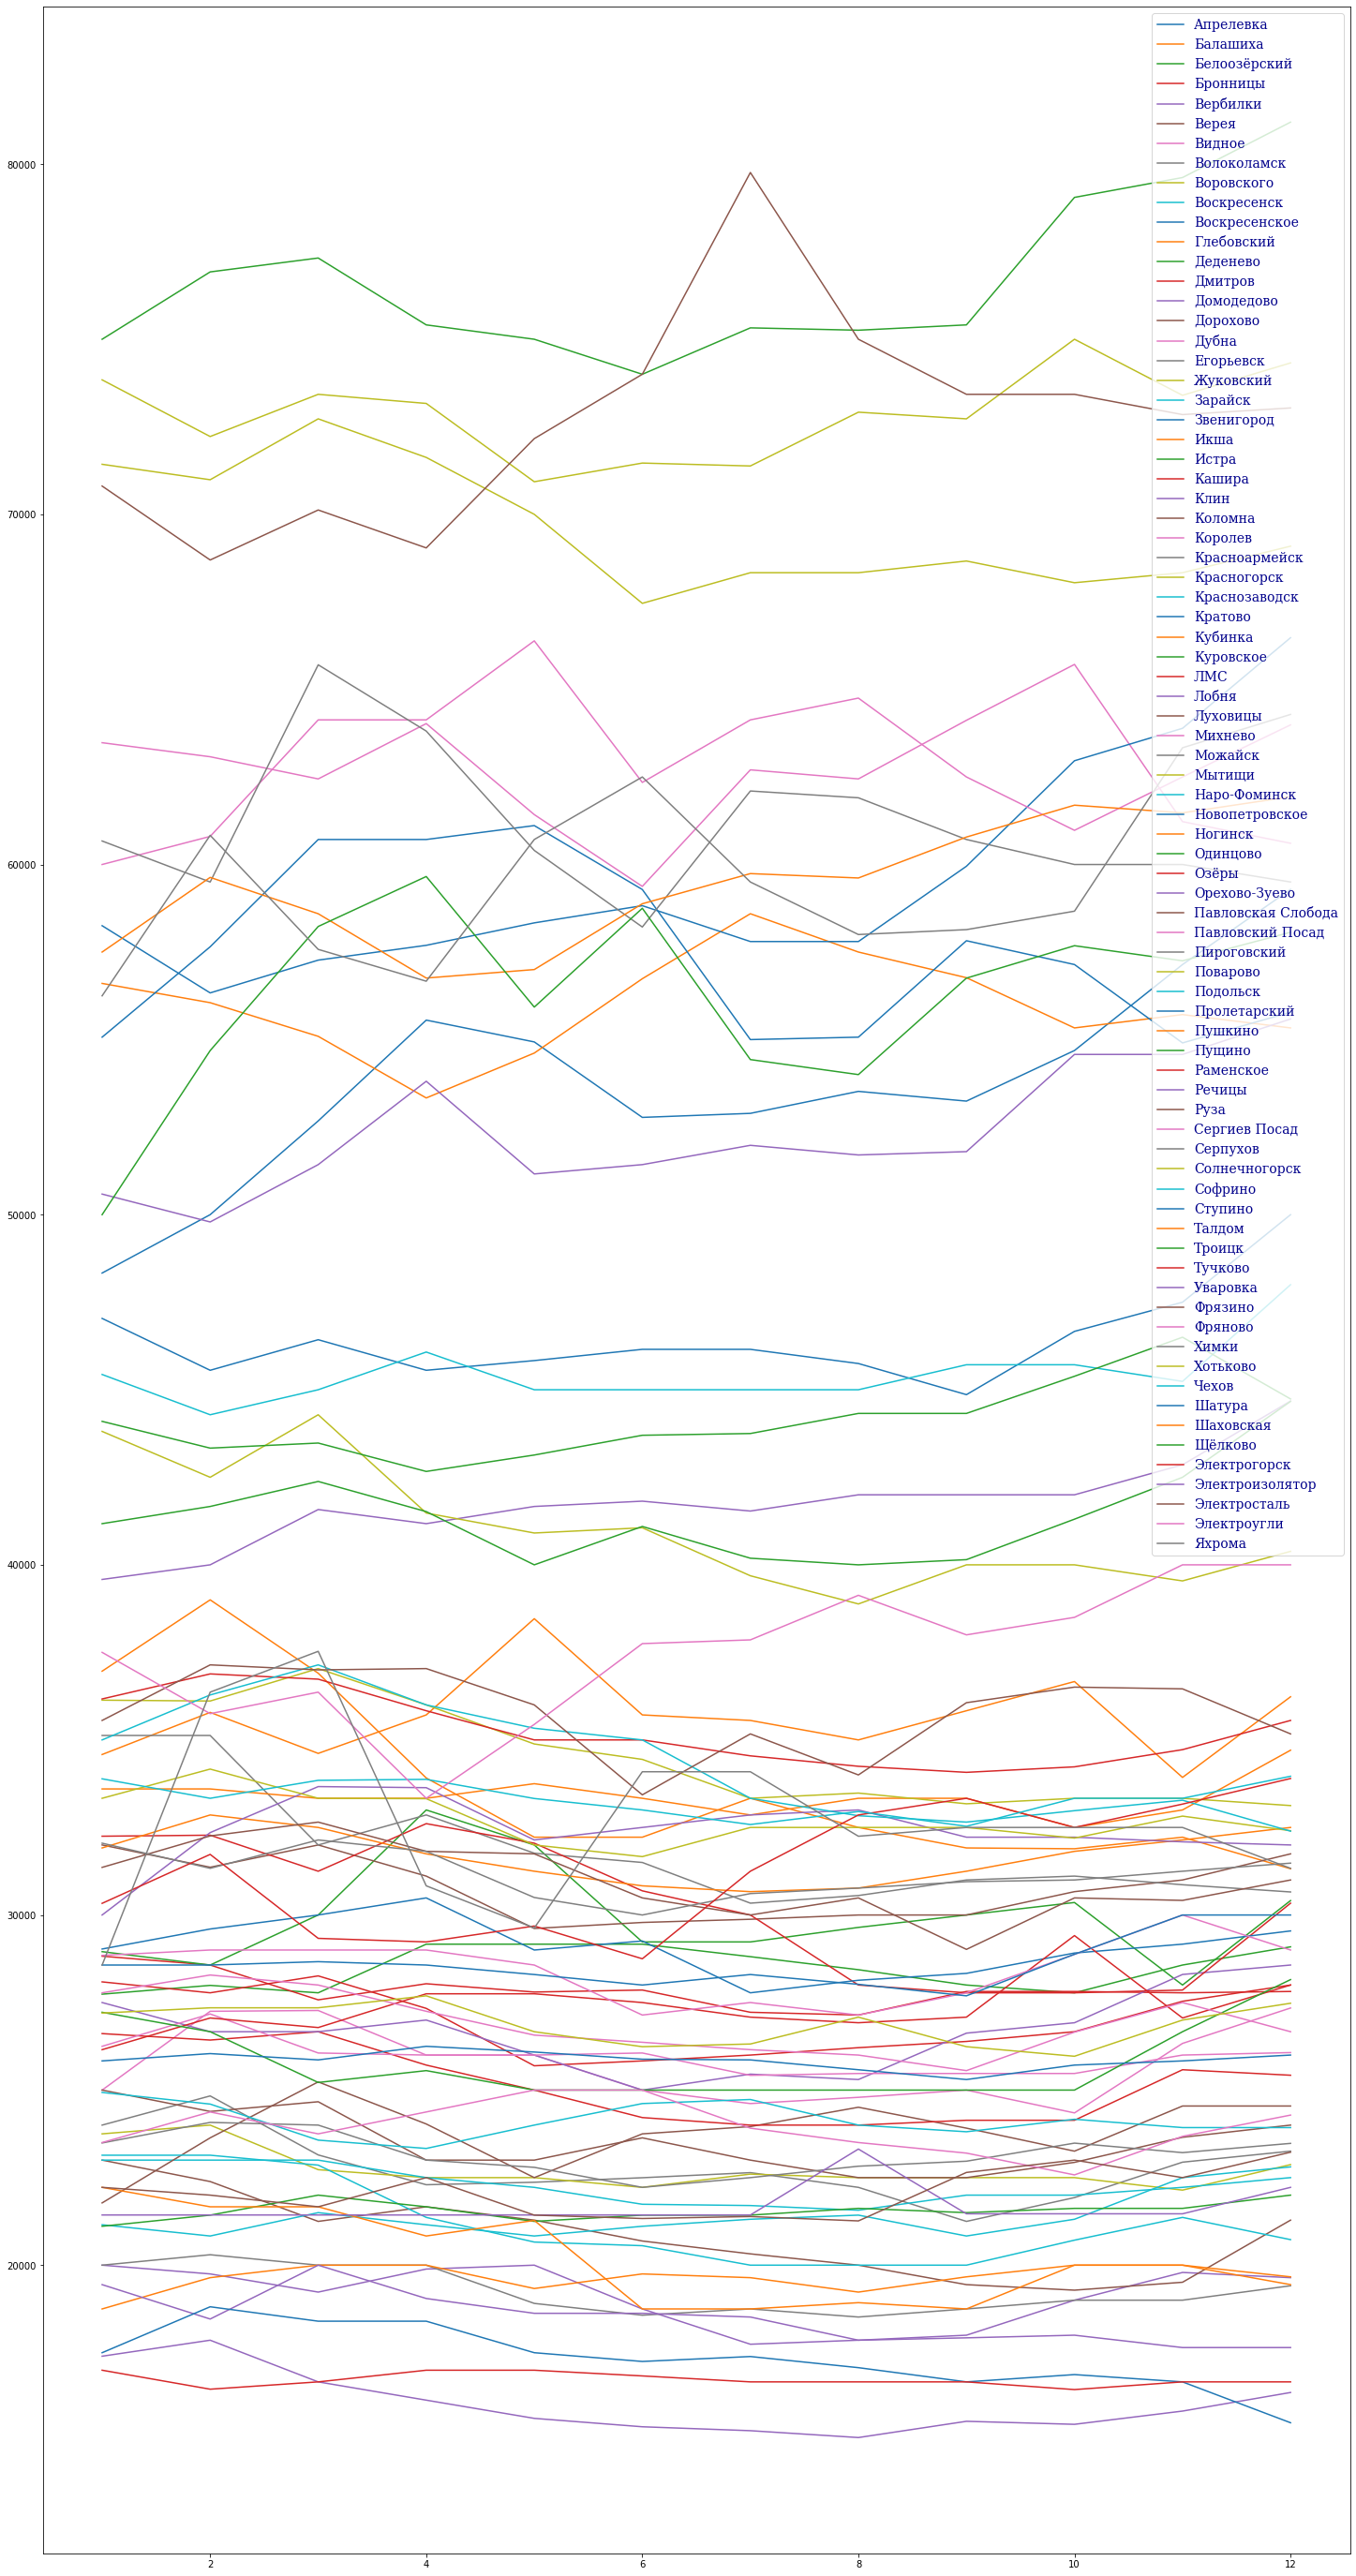

In [58]:
#  для каждого города в отдельности:
rcParams["figure.figsize"] = 25, 50

x = np.arange(1, 13)
for name in df19['Город']:
    y = np.array(df19[(df19['Город'] == name)].select_dtypes(include='int64')).flatten()
    plt.plot(x, y, label=name)

legend_font = {
    "size": 14,
    "family": "serif",
}
legend = plt.legend(loc="upper right", prop=legend_font)
plt.setp(legend.get_texts(), color="DarkBlue")
plt.show()

Видим, что на большинстве графиков отдельных городов сезонность не выражена либо выражена слабо, также есть города, в которых пик стоимости квадратного метра приходится на лето.

In [48]:
# Построим также общий график для всего периода:
df_prices = df[col_prices]
df_prices.insert(0, 'Город', df['Город'])

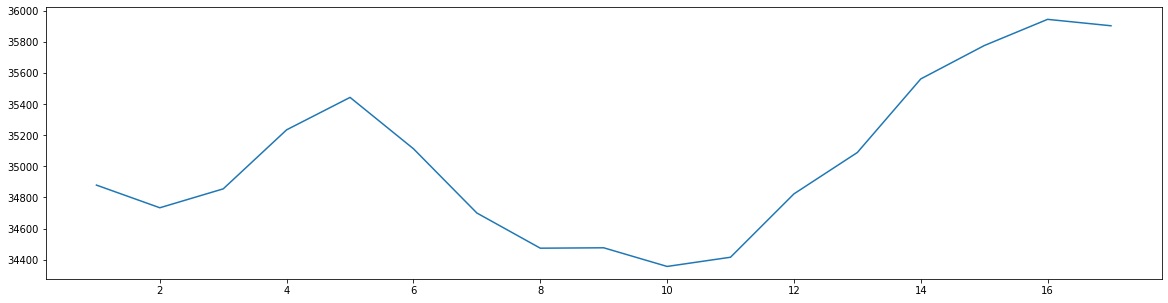

In [46]:
# для средних значений по всему периоду:
rcParams["figure.figsize"] = 20, 5

x = np.arange(1, 18)
y = df_prices.mean()
plt.plot(x, y)

plt.show()

In [47]:
z = y/y.mean()
z

ноя.18   1.00
дек.18   0.99
янв.19   0.99
фев.19   1.01
мар.19   1.01
апр.19   1.00
май.19   0.99
июн.19   0.98
июл.19   0.98
авг.19   0.98
сен.19   0.98
окт.19   0.99
ноя.19   1.00
дек.19   1.01
янв.20   1.02
фев.20   1.03
мар.20   1.02
dtype: float64

In [65]:
# Выборочная несмещенное среднеквадратическое отклонение за 2019 год:
df19[col_prices[2:14]].std(ddof=1)

янв.19   14634.45
фев.19   14650.58
мар.19   15219.47
апр.19   15149.46
май.19   15188.77
июн.19   15186.97
июл.19   15505.27
авг.19   15353.65
сен.19   15444.04
окт.19   15694.75
ноя.19   15595.87
дек.19   15870.72
dtype: float64

In [66]:
# по всему периоду:
df_prices[col_prices].std(ddof=1)

ноя.18   15236.81
дек.18   14615.64
янв.19   14634.45
фев.19   14650.58
мар.19   15219.47
апр.19   15149.46
май.19   15188.77
июн.19   15186.97
июл.19   15505.27
авг.19   15353.65
сен.19   15444.04
окт.19   15694.75
ноя.19   15595.87
дек.19   15870.72
янв.20   15982.57
фев.20   16156.54
мар.20   16233.16
dtype: float64

In [73]:
# по всему периоду по городам:
pd.set_option("display.max_rows", 80)
df_t = df_prices.set_index('Город').T.reset_index(drop=False).rename_axis(None)
df_t[list(df_t.columns)[1:]].std(ddof=1)

Город
Апрелевка            4171.34
Балашиха             1298.18
Белоозёрский          733.13
Бронницы              468.24
Вербилки              817.02
Верея                1221.08
Видное               1540.53
Волоколамск           967.72
Воровского            609.43
Воскресенск           496.42
Воскресенское        3487.07
Глебовский           2238.32
Деденево             1581.15
Дмитров               916.56
Домодедово           1623.73
Дорохово              931.87
Дубна                1149.46
Егорьевск             563.50
Жуковский            1460.48
Зарайск               646.52
Звенигород           1535.04
Икша                 1123.81
Истра                1571.70
Кашира               1373.78
Клин                 1115.70
Коломна               929.77
Королев              2881.15
Красноармейск        1691.22
Красногорск          2461.97
Краснозаводск        1271.33
Кратово              2243.12
Кубинка               557.30
Куровское             688.63
ЛМС                  1737.48
Лобня   

Видим, что более заметна просадка в летний период, а также рост в последние месяцы анализируемого периода, что также логично,
так как в долгосрочной перспективе недвижимость имеет тенденцию к удорожанию.

Итак, в целом по Московской области наблюдаются небольшие сезонные колебания цен, но для каждого отдельно взятого города динамика может быть иной. Проверим зависимость цен от других факторов.

# Зависимость цен от удаленности от МКАД и численности населения

Распределение цены 1 кв.м. по удаленности от МКАД:

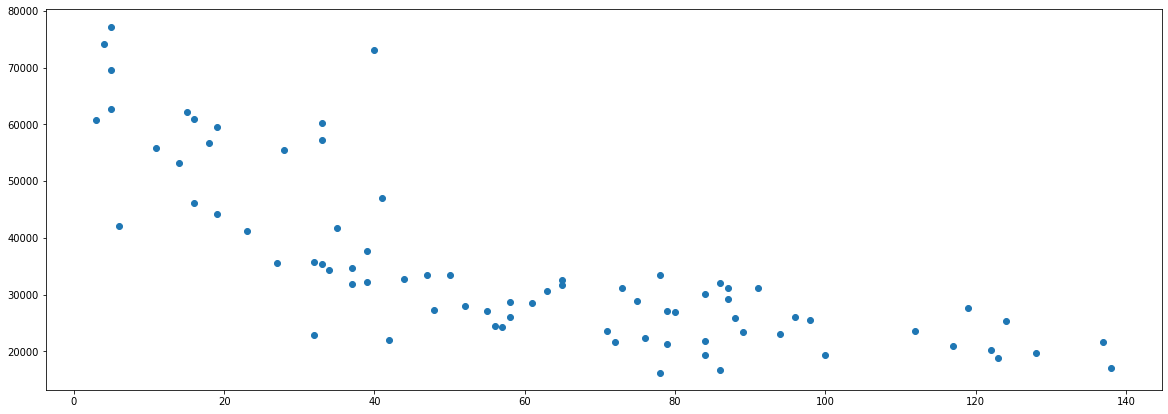

In [74]:
rcParams["figure.figsize"] = 20, 7
x = df['км от МКАД']
y = df[col_prices].sum(axis=1)/len(col_prices)
plt.scatter(x, y)

Распределение удаленностей:

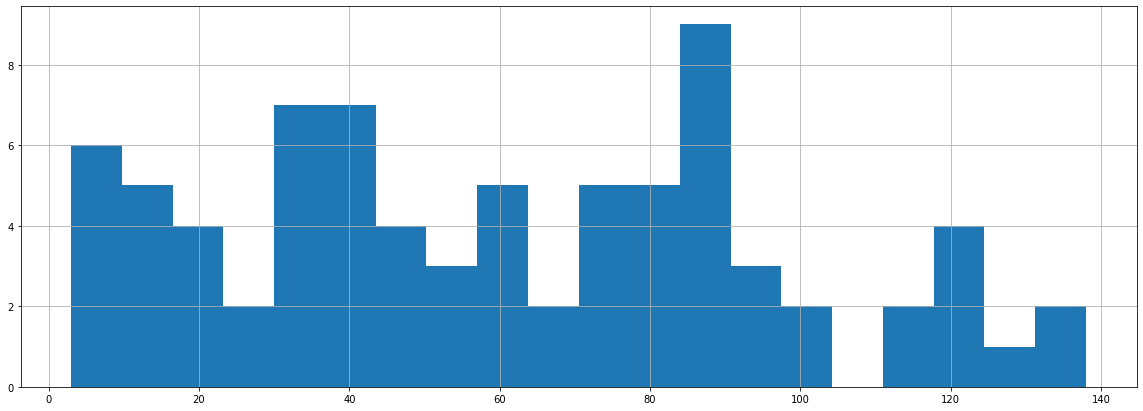

In [77]:
df['км от МКАД'].hist(bins=20)

Распределение цены 1 кв.м. по численности населения:

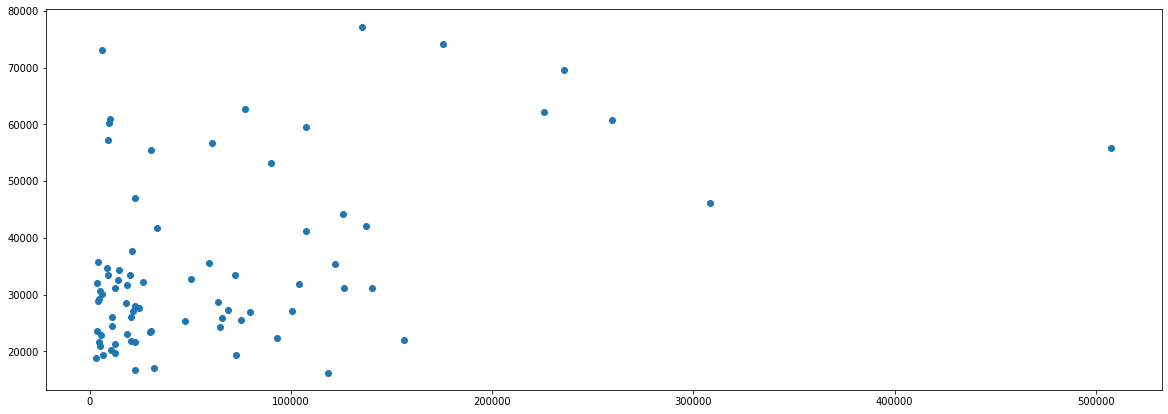

In [75]:
x = df['население']
y = df[col_prices].sum(axis=1)/len(col_prices)
plt.scatter(x, y)

Распределение цены численности населения:

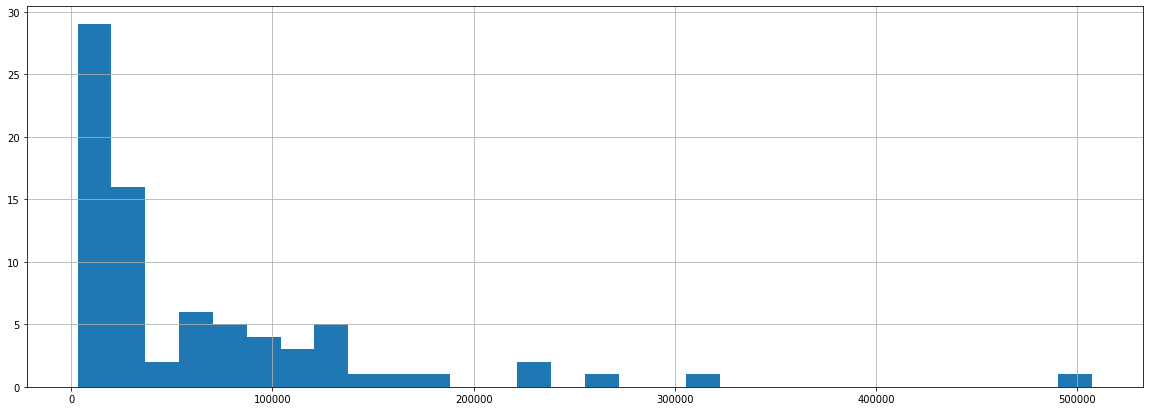

In [79]:
df['население'].hist(bins=30)

Визуально явно прослеживается зависимость цены кв.метра от расстояния. Проведем дисперсионный анализ и проверим обе гипотезы.